## Laboratorio di Simulazione Numerica 

# ESERCITAZIONE 1 #

### esercizio 1.01 

In questo esercizio abbiamo testato il generatore di numeri pseudo-casuali fornitoci dal sito Ariel del laboratorio.
Per fare ciò abbiamo stimato il valore dell'integrale noto:  $\langle r \rangle = \int_0^1 r dr$ come media di numeri generati casualmente da 0 e 1.
Per il valore dell'integrale abbiamo fatto la media utilizzando il metodo dei blocchi. dati M estrazioni casuali, chiamate anche lanci, abbiamo diviso queste in N blocchi, ciascuno dei quali formato da L elementi. Per ciascun blocco abbiamo stimato un valore medio $A_i$.
Dopodichè come valore medio totale abbiamo utilizzato la media dei valori medi, per quanto riguarda invece l'incertezza abbiamo calcolato le grandezze:
 $$ \langle A^2 \rangle \simeq \frac{1}{N} \sum_{i=1}^N A^2_i \quad \quad \langle A\rangle^2 \simeq \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 $$
 
Sapendo che l'incertezza può essere stimata nel seguente modo:
 $$\sigma^2_A := \langle (A-\langle A\rangle)^2\rangle = \langle A^2 \rangle -\langle A\rangle^2 $$
 
abbiamo stimato pertanto il valore dell'incertezza sulla media:
    $$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N A^2_i - \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 \right]} $$

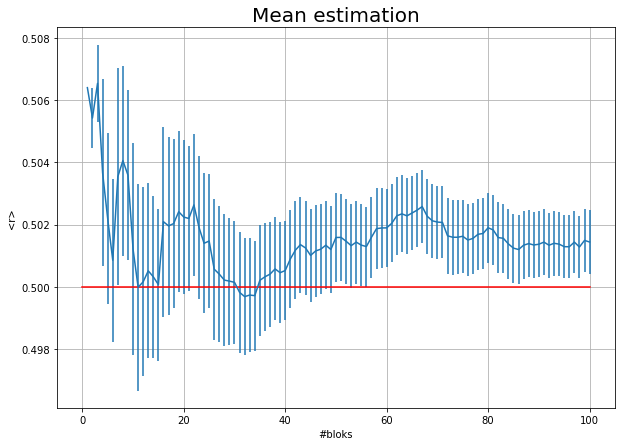

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

x, f, error = np.loadtxt("output1.01.1.txt", usecols=(0,1,2), delimiter='\t', unpack='true')
plt.figure(figsize=(10,7))
plt.errorbar(x,f,error)
plt.title('Mean estimation',fontsize=20)
plt.xlabel('#bloks')
plt.ylabel('<r>')
plt.grid(True)
plt.plot([0,100],[0.5,0.5], color="red")
plt.show()


In questo grafico abbiamo riportato il valore di r trovato in funzione del numero di blocchi. In rosso vi è rappresentato il valore atteso dell'integrale noto (ovvero 1/2). Abbiamo eseguito 100000 lanci divisi in 100 blocchi da 1000 lanci ciascuno.
L'errore è stato stimato col metodo dei blocchi, sul valor medio di un blocco abbiamo considerato le stime di tutti i blocchi precedenti. Si può notare come, al crescere del numero di blocchi, il valore dell'errore diminuisca e valore medio si stabilizzi in corrispondenza ad un valore compatibile con quello atteso, infatti anche se i valori ottenuti non rientrano in una $\sigma$ ,sono ampiamente entro le due $\sigma$, i dati ottenuti sono statisticamente significativi
.

In maniera analoga abbiamo poi stimato il valore della varianza: $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$

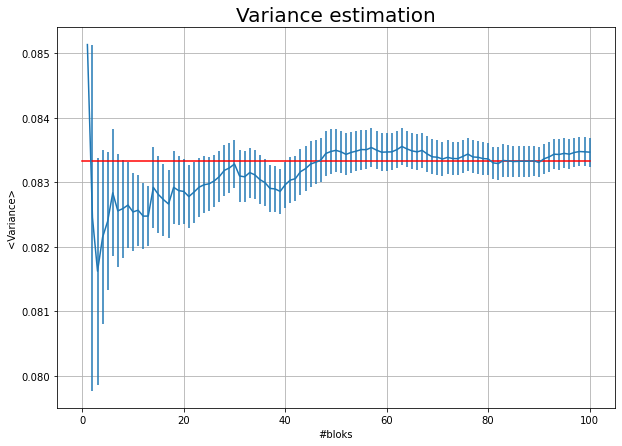

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

x, f, error = np.loadtxt("output1.01.2.txt", usecols=(0,1,2), delimiter='\t', unpack='true')
plt.figure(figsize=(10,7))
plt.errorbar(x,f,error)
plt.title('Variance estimation',fontsize=20)
plt.xlabel('#bloks')
plt.ylabel('<Variance>')
plt.grid(True)
plt.plot([0,100],[1/12,1/12], color="red")

plt.show()

In questo caso abbiamo riportato il valore di $\sigma^2$ trovato in funzione del numero di blocchi, e in rosso vi è rappresentato il valore atteso dell'integrale noto (ovvero 1/12).

Abbiamo poi implementato un test del chi-quadro per testare l'effettiva randomicità del nostro generatore. Abbiamo diviso l'intervallo $[0,1]$ in $M = 100$ intervalli e abbiamo effettuato $N = 10000$ lanci. Abbiamo eseguito tale test per 100 volte.



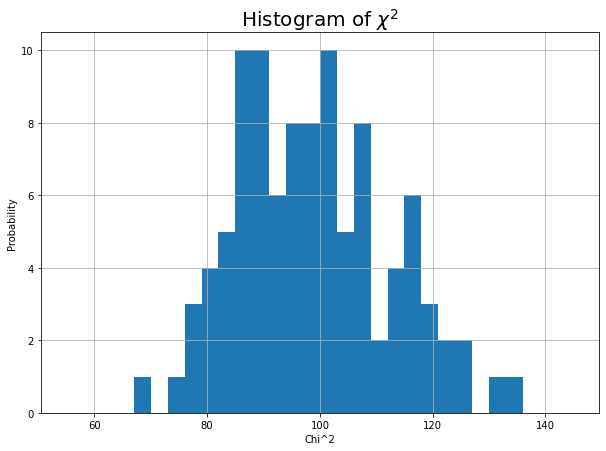

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

n_bins = 30
x = np.loadtxt("output1.01.3.txt")
plt.figure(figsize=(10,7))
n, bins, patches = plt.hist(x, n_bins, range=(55,145))
plt.xlabel('Chi^2')
plt.ylabel('Probability')
plt.title('Histogram of ${\chi}^2$',fontsize=20)
plt.grid(True)

plt.show()


Questo è un istogramma che rappresenta la distribuzione dei valori dei ${\chi}^2$ trovati. Valori vicini a 100 per il ${\chi}^2$ non sono da considerare anomali, anzi, visti i 100 gradi di libertà ci aspettavamo un valore prossimo a 100.

### esercizio 1.02 

Per verificare il Teorema del Limite Centrale (CLT) abbiamo:

implementato, in aggiunta alla distribuzione uniforme dell'esercizio 1.01, due nuove distribuzioni al nostro generatore: una generica distribuzione esponentiale </font>, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$, e una generica distribuzione di Cauchy-Lorentz </font> $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$, entrambe ricavate grazie al metodo dell'inversione della cumulativa.

Poichè sia la distribuzione uniforme che quella esponenziale sono a varianza finita, è effettivamente possibile applicare il CLT, caso diverso è quello della distribuzione lorentziana (a varianza infinita).

Di seguito sono riportati gli istogrammi ottenuti riempendo con $10^4$ realizzazioni di $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), dove $x_i$ è una variabile random ottenuta lanciando ripettivamente una dado standard, un dado esponenziale (con $\lambda = 1$) e un dado lorentziano (con $\mu = 0$ e $\Gamma = 1)$

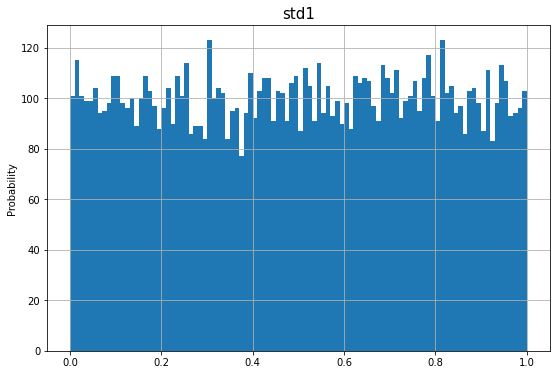

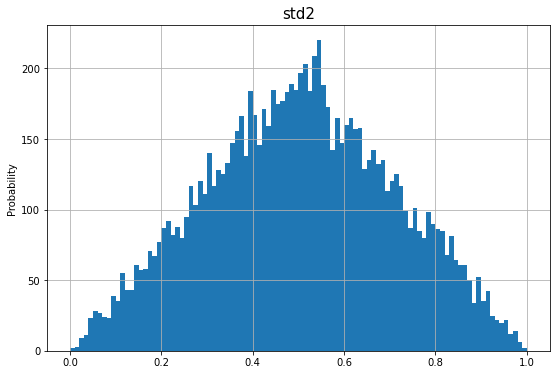

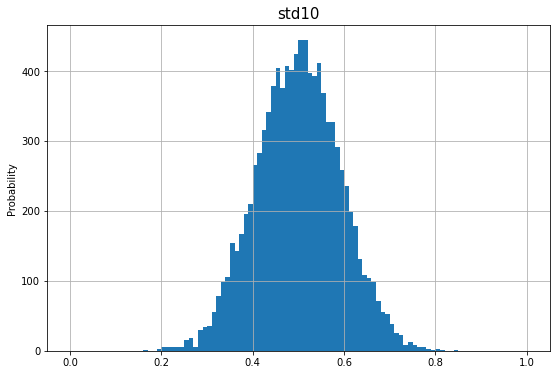

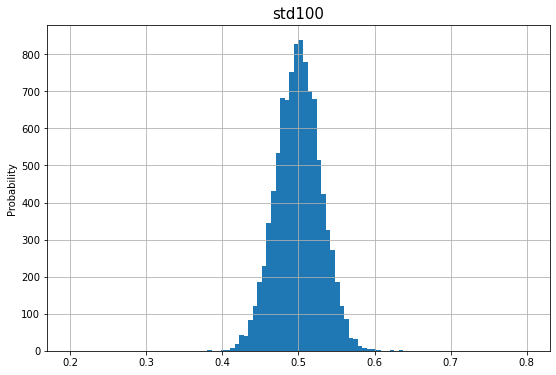

In [6]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt



n_bins = 100
x = np.loadtxt("std1.txt")
plt.figure(figsize=(9, 6))
n, bins, patches = plt.hist(x, n_bins, range=(0,1))

plt.xlabel('')
plt.ylabel('Probability')
plt.title('std1',fontsize=15)
plt.grid(True)



n_bins = 100
x = np.loadtxt("std2.txt")
plt.figure(figsize=(9, 6))
n, bins, patches = plt.hist(x, n_bins, range=(0,1))

plt.xlabel('')
plt.ylabel('Probability')
plt.title('std2',fontsize=15)
plt.grid(True)



n_bins = 100
x = np.loadtxt("std10.txt")
plt.figure(figsize=(9, 6))
n, bins, patches = plt.hist(x, n_bins, range=(0,1))

plt.xlabel('')
plt.ylabel('Probability')
plt.title('std10',fontsize=15)
plt.grid(True)



n_bins = 100
x = np.loadtxt("std100.txt")
plt.figure(figsize=(9, 6))
n, bins, patches = plt.hist(x, n_bins, range=(0.2,0.8))

plt.xlabel('')
plt.ylabel('Probability')
plt.title('std100',fontsize=15)
plt.grid(True)


plt.show()

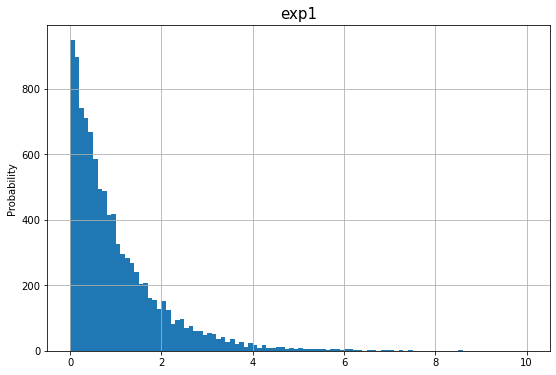

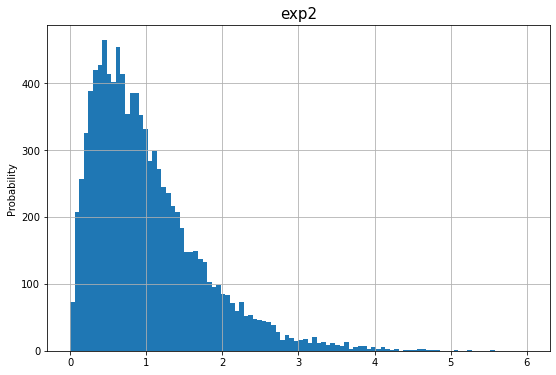

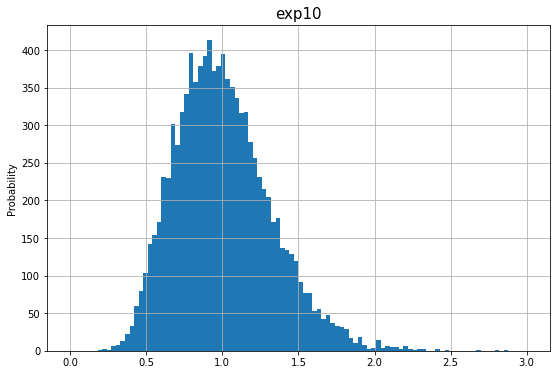

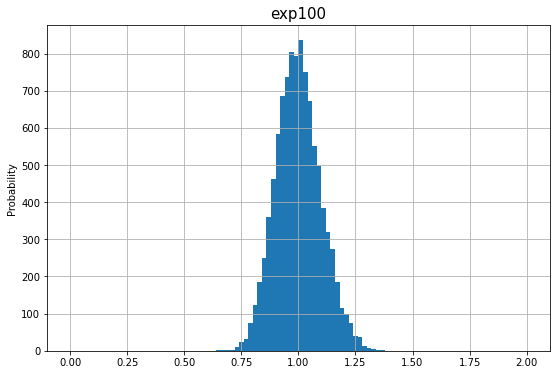

In [7]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt



n_bins = 100
x = np.loadtxt("exp1.txt")
plt.figure(figsize=(9, 6))
n, bins, patches = plt.hist(x, n_bins, range=(0,10))

plt.xlabel('')
plt.ylabel('Probability')
plt.title('exp1',fontsize=15)
plt.grid(True)



n_bins = 100
x = np.loadtxt("exp2.txt")
plt.figure(figsize=(9, 6))
n, bins, patches = plt.hist(x, n_bins, range=(0,6))

plt.xlabel('')
plt.ylabel('Probability')
plt.title('exp2',fontsize=15)
plt.grid(True)



n_bins = 100
x = np.loadtxt("exp10.txt")
plt.figure(figsize=(9, 6))
n, bins, patches = plt.hist(x, n_bins, range=(0,3))

plt.xlabel('')
plt.ylabel('Probability')
plt.title('exp10',fontsize=15)
plt.grid(True)



n_bins = 100
x = np.loadtxt("exp100.txt")
plt.figure(figsize=(9, 6))
n, bins, patches = plt.hist(x, n_bins, range=(0,2))

plt.xlabel('')
plt.ylabel('Probability')
plt.title('exp100',fontsize=15)
plt.grid(True)


plt.show()

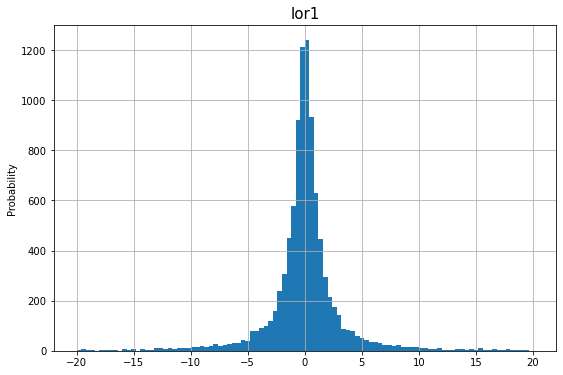

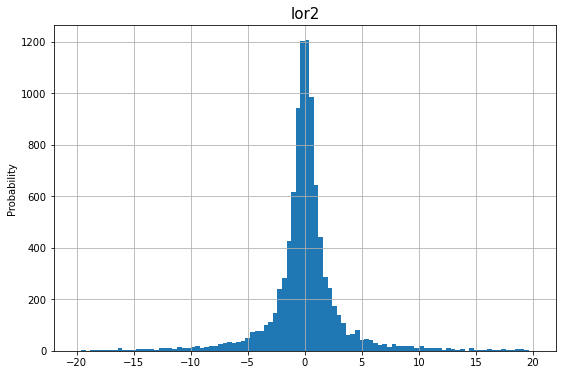

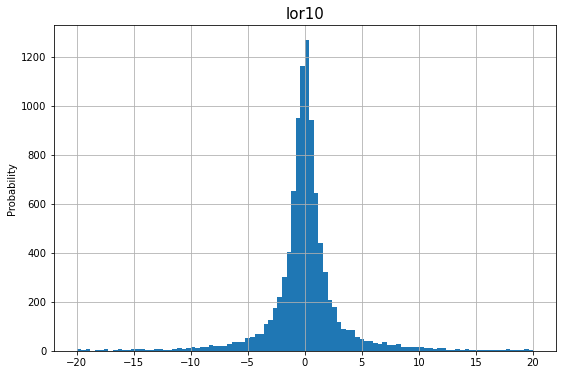

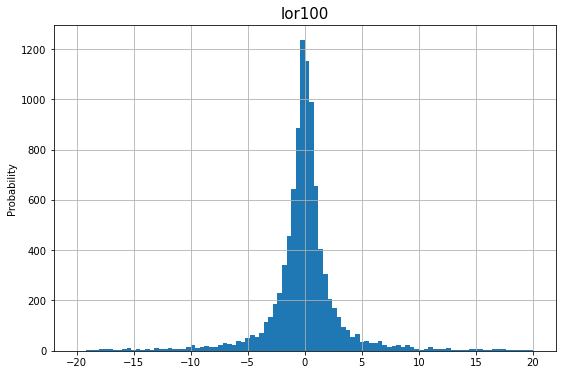

In [8]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt



n_bins = 100
x = np.loadtxt("Cauchy1.txt")
plt.figure(figsize=(9, 6))
n, bins, patches = plt.hist(x, n_bins, range=(-20,20))

plt.xlabel('')
plt.ylabel('Probability')
plt.title('lor1',fontsize=15)
plt.grid(True)



n_bins = 100
x = np.loadtxt("Cauchy2.txt")
plt.figure(figsize=(9, 6))
n, bins, patches = plt.hist(x, n_bins, range=(-20,20))

plt.xlabel('')
plt.ylabel('Probability')
plt.title('lor2',fontsize=15)
plt.grid(True)



n_bins = 100
x = np.loadtxt("Cauchy10.txt")
plt.figure(figsize=(9, 6))
n, bins, patches = plt.hist(x, n_bins, range=(-20,20))

plt.xlabel('')
plt.ylabel('Probability')
plt.title('lor10',fontsize=15)
plt.grid(True)



n_bins = 100
x = np.loadtxt("Cauchy100.txt")
plt.figure(figsize=(9, 6))
n, bins, patches = plt.hist(x, n_bins, range=(-20,20))

plt.xlabel('')
plt.ylabel('Probability')
plt.title('lor100',fontsize=15)
plt.grid(True)


plt.show()

Per le prime due distribuzioni: la uniforme e la esponenziale, risulta verificato il CLT: a grande N hanno come bacino di attrazione la distribuzione gausssiana. La distribuzione Lorentziana risulta bacino di attrazione di sé stessa.

### esercizio 1.03

Successivamente è stato simulato l'esperimento di Buffon, utilizzato per la stima del valore di $\pi$.
L'esperimento consiste in un ago di lunghezza $L$, lanciato un numero di volte $N_{thr}$ su un piano avente disegnate delle righe orizzontali equispaziate a distanza d, con $d>L$. La probabilità che l'ago intersechi una riga è $P = \frac{2L}{\pi d}$, con $N_{hit}$ il numero di volte che interseca una riga, il valore di $\pi$ viene stimato nel seguente modo:
 $\pi = \frac{2L}{Pd} = \frac{2L*N_{thr}}{N_{hit}d}$
 
 Abbiamo stimato il valore medio e l'errore di $\frac{N_{hit}}{N_{thr}}$ con il metodo dei blocchi, usando 100 blocchi da 100000 lanci l'uno. Abbiamo poi utilizzato la formula scritta precedentemente per stimare $\pi$ e il rispettivo errore: 

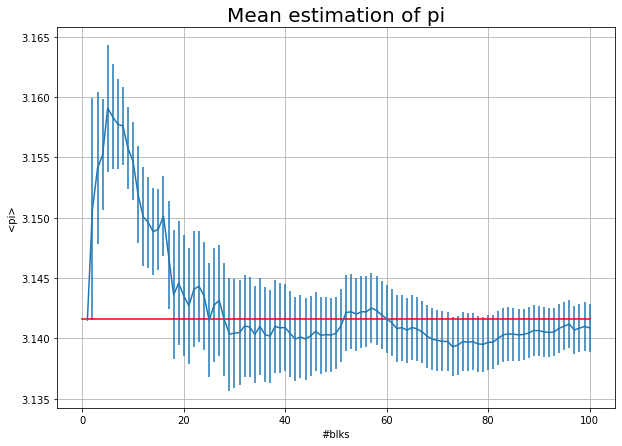

Estimate:
3.14088
Uncertainty:
0.001978


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

x, f, error = np.loadtxt("pi.txt", usecols=(0,1,2), delimiter='\t', unpack='true')
plt.figure(figsize=(10,7))
plt.errorbar(x,f,error)
plt.title('Mean estimation of pi',fontsize=20)
plt.xlabel('#blks')
plt.ylabel('<pi>')
plt.grid(True)
plt.plot([0,100],[math.pi,math.pi], color="red")
plt.show()
print("Estimate:")
print(f[-1])
print("Uncertainty:")
print(error[-1])

I risultati ottenuti sono compatibili con quelli attesi. 

Difficoltà di questa simulazione è stata quella di non poter utilizzare il valore di $\pi per generare un angolo piano casuale. Per fare ciò è stato utilizzato un metodo di accetto-rigetto: generato un punto all'interno di un quadrato 2x2 centrato nell'origine. il punto è stato accettato solo se all'interno della circonferenza unitaria e poi utilizzato l'arcotangente del rapporto delle coordinate di quel punto per trovare l'angolo.